# Heart Disease Prediction using BRFSS dataset

In [1]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("heart_2020_cleaned.csv")


In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.PhysicalHealth.unique()

array([ 3.,  0., 20., 28.,  6., 15.,  5., 30.,  7.,  1.,  2., 21.,  4.,
       10., 14., 18.,  8., 25., 16., 29., 27., 17., 24., 12., 23., 26.,
       22., 19.,  9., 13., 11.])

In [6]:
df[['HeartDisease']].value_counts()

HeartDisease
No              292422
Yes              27373
dtype: int64

In [7]:
undersample = RandomUnderSampler(sampling_strategy='majority')

# Fit and apply the undersampling strategy
X_under, y_under = undersample.fit_resample(df.drop('HeartDisease', axis=1), df.HeartDisease)

In [8]:
df = pd.concat([X_under, y_under], axis=1)

In [9]:
df['HeartDisease'].value_counts()

No     27373
Yes    27373
Name: HeartDisease, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [11]:
transformed_df = df.copy()

In [12]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54746 entries, 0 to 54745
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               54746 non-null  float64
 1   Smoking           54746 non-null  object 
 2   AlcoholDrinking   54746 non-null  object 
 3   Stroke            54746 non-null  object 
 4   PhysicalHealth    54746 non-null  float64
 5   MentalHealth      54746 non-null  float64
 6   DiffWalking       54746 non-null  object 
 7   Sex               54746 non-null  object 
 8   AgeCategory       54746 non-null  object 
 9   Race              54746 non-null  object 
 10  Diabetic          54746 non-null  object 
 11  PhysicalActivity  54746 non-null  object 
 12  GenHealth         54746 non-null  object 
 13  SleepTime         54746 non-null  float64
 14  Asthma            54746 non-null  object 
 15  KidneyDisease     54746 non-null  object 
 16  SkinCancer        54746 non-null  object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_df, test_df = train_test_split(df, train_size=0.8, stratify=df.HeartDisease)

**Binary columns:**
- Yes/No columns:
    - Smoking
    - AlcoholDrinking
    - Stroke
    - DiffWalking
    - PhysicalActivity
    - Asthma
    - KidneyDisease
    - SkinCancer
- Other binary Columns:
    - Sex
    
**Category columns:**
- Race
- AgeCategory
- GenHealth
- Diabetic

**Continous columns:**
- BMI
- PhysicalHealth
- MentalHealth
- SleepTime

In [15]:
# Encoding Binary Features
binary_features = ['HeartDisease', 
                   'Smoking', 
                   'AlcoholDrinking', 
                   'Stroke', 
                   'DiffWalking', 
                   'PhysicalActivity', 
                   'Asthma', 
                   'KidneyDisease',
                   'SkinCancer']

train_df[binary_features] = train_df[binary_features].replace({'No':0, 'Yes':1})
test_df[binary_features] = test_df[binary_features].replace({'No':0, 'Yes':1})
train_df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
36330,38.52,0,0,0,15.0,0.0,1,Male,60-64,Black,Yes,1,Good,6.0,0,1,0,1
34034,24.39,1,0,1,15.0,0.0,1,Female,80 or older,White,Yes,0,Poor,10.0,0,0,0,1
4862,30.54,1,0,0,0.0,2.0,0,Female,70-74,White,No,1,Very good,8.0,0,0,0,0
44109,31.87,0,0,0,0.0,0.0,0,Male,70-74,White,No,1,Very good,6.0,0,0,1,1
50884,25.77,0,0,0,15.0,2.0,0,Male,65-69,White,No,1,Very good,7.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32298,30.41,1,0,0,0.0,0.0,0,Male,70-74,White,No,1,Fair,7.0,0,0,1,1
8854,42.43,1,0,0,30.0,30.0,1,Female,65-69,White,No,0,Good,8.0,1,0,0,0
26584,25.70,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,No,1,Excellent,6.0,0,0,0,0
30912,25.11,0,1,0,0.0,0.0,0,Male,80 or older,White,No,1,Good,8.0,0,0,1,1


In [16]:
df.BMI.describe()

count    54746.000000
mean        28.810855
std          6.487351
min         12.210000
25%         24.390000
50%         27.780000
75%         32.040000
max         88.600000
Name: BMI, dtype: float64

Skewness - 1.267166847714222


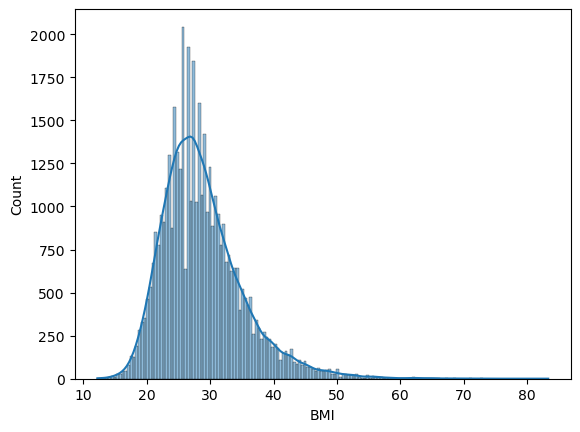

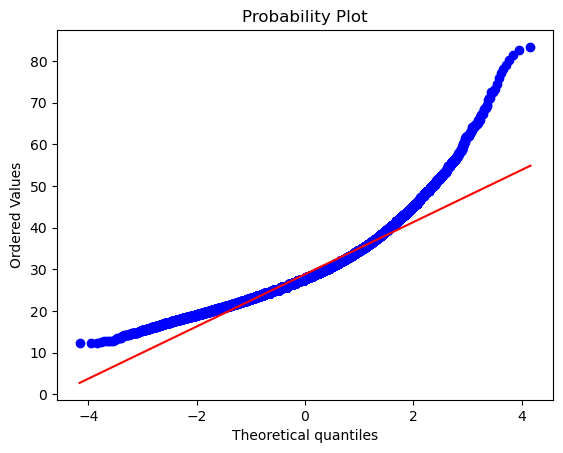

In [17]:
#histogram and normal probability plot
sns.histplot(train_df.BMI, kde=True, stat="count")
fig = plt.figure()
res = stats.probplot(train_df.BMI, plot=plt)
print(f"Skewness - {train_df.BMI.skew()}")

In [18]:
train_df['BMI'] = np.log(train_df['BMI'])
test_df['BMI'] = np.log(test_df['BMI'])

Skewness - 0.38917841400419767


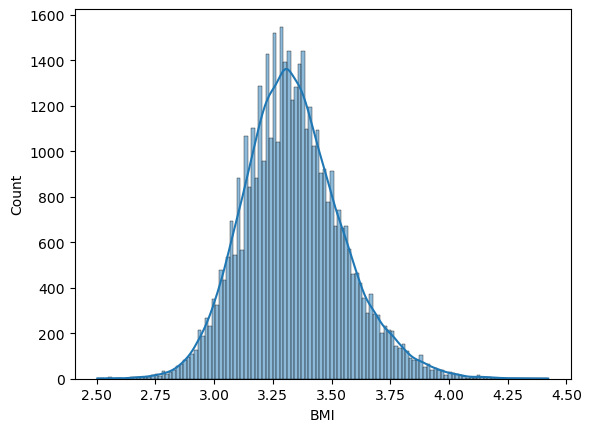

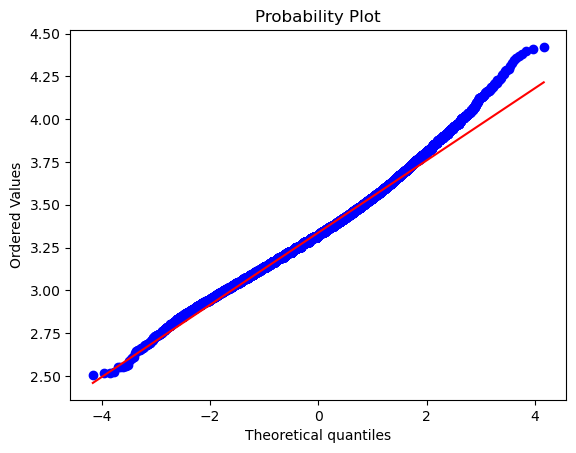

In [19]:
#histogram and normal probability plot
sns.histplot(train_df.BMI, kde=True, stat="count")
fig = plt.figure()
res = stats.probplot(train_df.BMI, plot=plt)
print(f"Skewness - {train_df.BMI.skew()}")

In [20]:
train_df.BMI.describe()

count    43796.000000
mean         3.337176
std          0.212095
min          2.502255
25%          3.194173
50%          3.323596
75%          3.464485
max          4.422809
Name: BMI, dtype: float64

In [21]:
train_df.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,43796.000000,43796.000000,43796.000000,43796.000000,43796.000000,43796.000000,43796.000000,43796.000000,43796.000000,43796.000000,43796.000000,43796.000000,43796.000000
mean,3.337176,0.490479,0.055370,0.093433,5.354667,4.239953,0.239542,0.714791,7.117408,0.155768,0.077427,0.132843,0.500000
std,0.212095,0.499915,0.228704,0.291042,9.940774,8.550752,0.426809,0.451519,1.590748,0.362639,0.267271,0.339409,0.500006
min,2.502255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.194173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,3.323596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.500000
75%,3.464485,1.000000,0.000000,0.000000,5.000000,3.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000
max,4.422809,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
def groupedBarPlot(xt, yt):
    fig = plt.figure(figsize = (15, 5))
    
    # creating the bar plot
    plt.bar(xt[1], yt[1], color ='blue', width = 0.4)

    plt.xlabel(xt[0])
    plt.ylabel(yt[0])
    plt.title(xt[0] + " vs " + yt[0])
    plt.show()

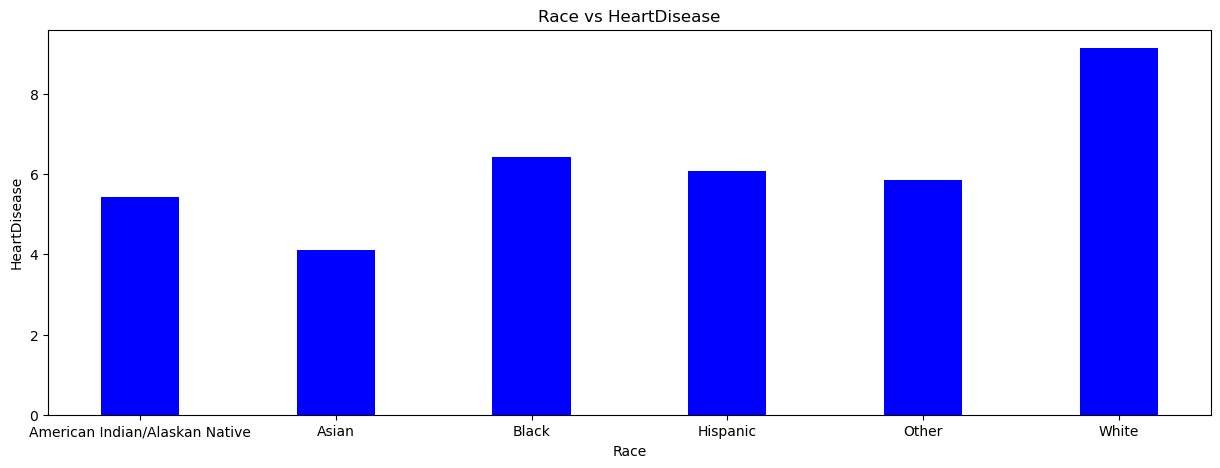

In [23]:
x_col = 'Race'
y_col = 'HeartDisease'
grouped = train_df[[x_col, y_col]].groupby(by=x_col)
temp_var = np.log(grouped.sum()*grouped.sum()/grouped.count())[y_col]
xvalues = temp_var.index
yvalues = temp_var.values
groupedBarPlot((x_col, xvalues), (y_col, yvalues))

In [24]:
raceNormalized = dict(zip(xvalues, yvalues))
raceNormalized

{'American Indian/Alaskan Native': 5.435450438408918,
 'Asian': 4.118877748745973,
 'Black': 6.435419655439185,
 'Hispanic': 6.073647532225262,
 'Other': 5.8466836407218,
 'White': 9.14435246347695}

In [25]:
train_df['Race'] = train_df['Race'].replace(raceNormalized)
test_df['Race'] = test_df['Race'].replace(raceNormalized)
train_df.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
36330,3.651178,0,0,0,15.0,0.0,1,Male,60-64,6.435420,Yes,1,Good,6.0,0,1,0,1
34034,3.194173,1,0,1,15.0,0.0,1,Female,80 or older,9.144352,Yes,0,Poor,10.0,0,0,0,1
4862,3.419037,1,0,0,0.0,2.0,0,Female,70-74,9.144352,No,1,Very good,8.0,0,0,0,0
44109,3.461665,0,0,0,0.0,0.0,0,Male,70-74,9.144352,No,1,Very good,6.0,0,0,1,1
50884,3.249211,0,0,0,15.0,2.0,0,Male,65-69,9.144352,No,1,Very good,7.0,0,0,1,1


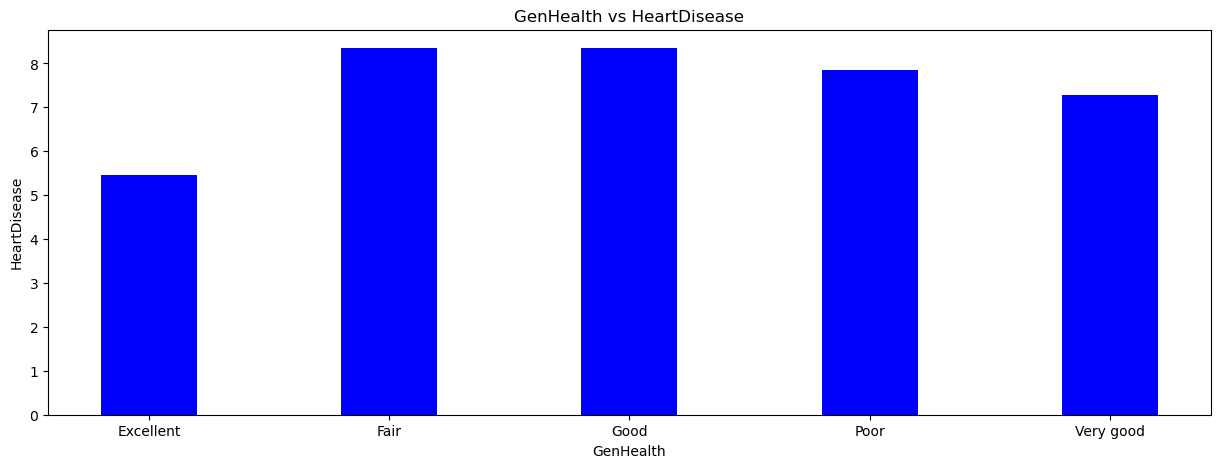

In [26]:
x_col = 'GenHealth'
y_col = 'HeartDisease'
grouped = train_df[[x_col, y_col]].groupby(by=x_col)
temp_var = np.log(grouped.sum()*grouped.sum()/grouped.count())[y_col]
xvalues = temp_var.index
yvalues = temp_var.values
groupedBarPlot((x_col, xvalues), (y_col, yvalues))

In [27]:
genHealthNormalized = dict(zip(xvalues, yvalues))
genHealthNormalized

{'Excellent': 5.470690402618537,
 'Fair': 8.346162773966546,
 'Good': 8.350493987568369,
 'Poor': 7.857486013152355,
 'Very good': 7.288530895377136}

In [28]:
train_df['GenHealth'] = train_df['GenHealth'].replace(genHealthNormalized)
test_df['GenHealth'] = test_df['GenHealth'].replace(genHealthNormalized)
train_df.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
36330,3.651178,0,0,0,15.0,0.0,1,Male,60-64,6.435420,Yes,1,8.350494,6.0,0,1,0,1
34034,3.194173,1,0,1,15.0,0.0,1,Female,80 or older,9.144352,Yes,0,7.857486,10.0,0,0,0,1
4862,3.419037,1,0,0,0.0,2.0,0,Female,70-74,9.144352,No,1,7.288531,8.0,0,0,0,0
44109,3.461665,0,0,0,0.0,0.0,0,Male,70-74,9.144352,No,1,7.288531,6.0,0,0,1,1
50884,3.249211,0,0,0,15.0,2.0,0,Male,65-69,9.144352,No,1,7.288531,7.0,0,0,1,1


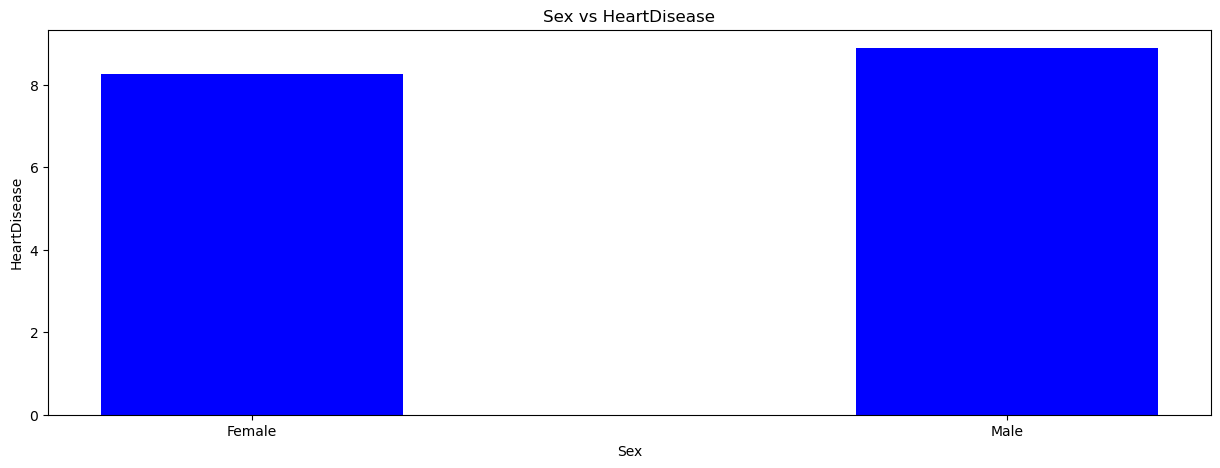

In [29]:
x_col = 'Sex'
y_col = 'HeartDisease'
grouped = train_df[[x_col, y_col]].groupby(by=x_col)
temp_var = np.log(grouped.sum()*grouped.sum()/grouped.count())[y_col]
xvalues = temp_var.index
yvalues = temp_var.values
groupedBarPlot((x_col, xvalues), (y_col, yvalues))

In [30]:
sexNormalized = dict(zip(xvalues, yvalues))
sexNormalized

{'Female': 8.25506468924153, 'Male': 8.893015554629711}

In [31]:
train_df['Sex'] = train_df['Sex'].replace(sexNormalized)
test_df['Sex'] = test_df['Sex'].replace(sexNormalized)
train_df.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
36330,3.651178,0,0,0,15.0,0.0,1,8.893016,60-64,6.435420,Yes,1,8.350494,6.0,0,1,0,1
34034,3.194173,1,0,1,15.0,0.0,1,8.255065,80 or older,9.144352,Yes,0,7.857486,10.0,0,0,0,1
4862,3.419037,1,0,0,0.0,2.0,0,8.255065,70-74,9.144352,No,1,7.288531,8.0,0,0,0,0
44109,3.461665,0,0,0,0.0,0.0,0,8.893016,70-74,9.144352,No,1,7.288531,6.0,0,0,1,1
50884,3.249211,0,0,0,15.0,2.0,0,8.893016,65-69,9.144352,No,1,7.288531,7.0,0,0,1,1


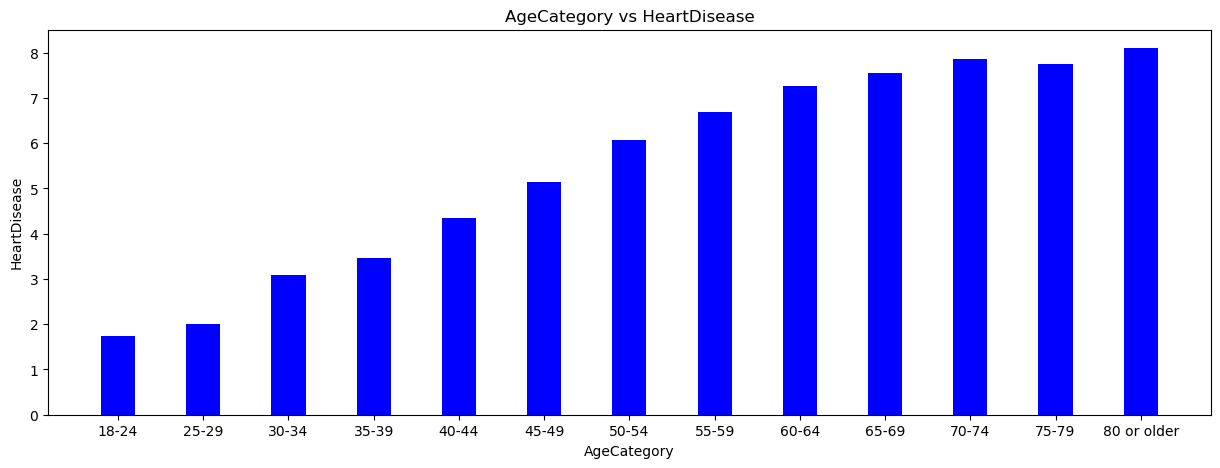

In [32]:
x_col = 'AgeCategory'
y_col = 'HeartDisease'
grouped = train_df[[x_col, y_col]].groupby(by=x_col)
temp_var = np.log(grouped.sum()*grouped.sum()/grouped.count())[y_col]
xvalues = temp_var.index
yvalues = temp_var.values
groupedBarPlot((x_col, xvalues), (y_col, yvalues))

In [33]:
ageNormalized = dict(zip(xvalues, yvalues))
ageNormalized

{'18-24': 1.7384174637412502,
 '25-29': 1.9980576415559346,
 '30-34': 3.0826866456615445,
 '35-39': 3.4585396359291316,
 '40-44': 4.35128238791212,
 '45-49': 5.136485783675904,
 '50-54': 6.061029933783029,
 '55-59': 6.699845954835849,
 '60-64': 7.268925219942076,
 '65-69': 7.55742988334039,
 '70-74': 7.854462887878542,
 '75-79': 7.746659196628244,
 '80 or older': 8.102446498825742}

In [34]:
train_df['AgeCategory'] = train_df['AgeCategory'].replace(ageNormalized)
test_df['AgeCategory'] = test_df['AgeCategory'].replace(ageNormalized)
train_df.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
36330,3.651178,0,0,0,15.0,0.0,1,8.893016,7.268925,6.435420,Yes,1,8.350494,6.0,0,1,0,1
34034,3.194173,1,0,1,15.0,0.0,1,8.255065,8.102446,9.144352,Yes,0,7.857486,10.0,0,0,0,1
4862,3.419037,1,0,0,0.0,2.0,0,8.255065,7.854463,9.144352,No,1,7.288531,8.0,0,0,0,0
44109,3.461665,0,0,0,0.0,0.0,0,8.893016,7.854463,9.144352,No,1,7.288531,6.0,0,0,1,1
50884,3.249211,0,0,0,15.0,2.0,0,8.893016,7.557430,9.144352,No,1,7.288531,7.0,0,0,1,1


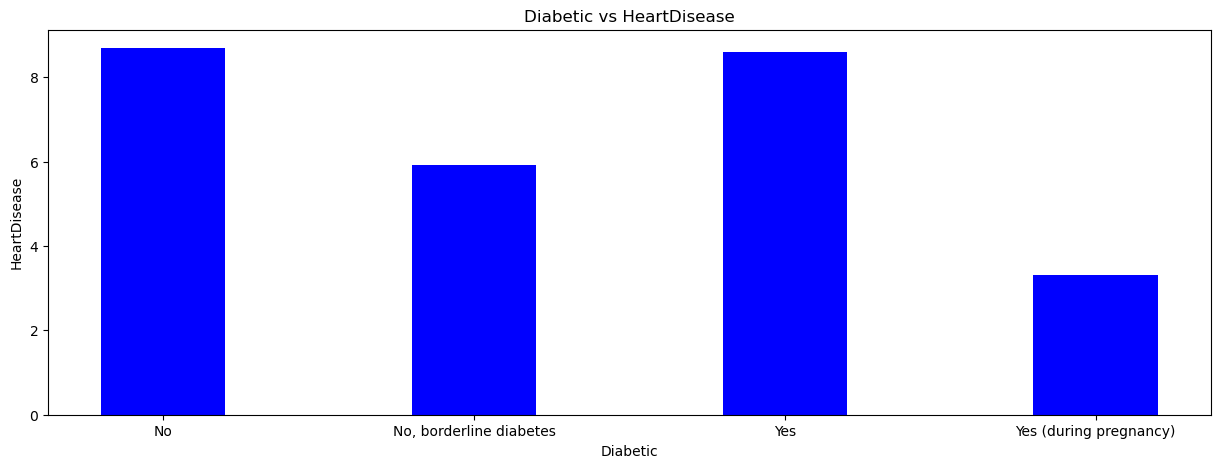

In [35]:
x_col = 'Diabetic'
y_col = 'HeartDisease'
grouped = train_df[[x_col, y_col]].groupby(by=x_col)
temp_var = np.log(grouped.sum()*grouped.sum()/grouped.count())[y_col]
xvalues = temp_var.index
yvalues = temp_var.values
xvalues_str = [str(x) for x in xvalues]
groupedBarPlot((x_col, xvalues_str), (y_col, yvalues))

In [36]:
diabeticNormalized = dict(zip(xvalues, yvalues))
diabeticNormalized

{'No': 8.693209049166395,
 'No, borderline diabetes': 5.9222129257731435,
 'Yes': 8.59001416630929,
 'Yes (during pregnancy)': 3.312228276461412}

In [37]:
train_df['Diabetic'] = train_df['Diabetic'].replace(diabeticNormalized)
test_df['Diabetic'] = test_df['Diabetic'].replace(diabeticNormalized)
train_df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
36330,3.651178,0,0,0,15.0,0.0,1,8.893016,7.268925,6.435420,8.590014,1,8.350494,6.0,0,1,0,1
34034,3.194173,1,0,1,15.0,0.0,1,8.255065,8.102446,9.144352,8.590014,0,7.857486,10.0,0,0,0,1
4862,3.419037,1,0,0,0.0,2.0,0,8.255065,7.854463,9.144352,8.693209,1,7.288531,8.0,0,0,0,0
44109,3.461665,0,0,0,0.0,0.0,0,8.893016,7.854463,9.144352,8.693209,1,7.288531,6.0,0,0,1,1
50884,3.249211,0,0,0,15.0,2.0,0,8.893016,7.557430,9.144352,8.693209,1,7.288531,7.0,0,0,1,1


In [38]:
train_df['PhysicalHealth'] = train_df.PhysicalHealth/30
test_df['PhysicalHealth'] = test_df.PhysicalHealth/30

train_df['MentalHealth'] = train_df.MentalHealth/30
test_df['MentalHealth'] = test_df.MentalHealth/30

train_df['SleepTime'] = train_df.SleepTime/24
test_df['SleepTime'] = test_df.SleepTime/24

In [39]:
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score, fbeta_score

In [40]:
X_train = train_df.drop('HeartDisease', axis=1)
y_train = train_df['HeartDisease']
X_test = test_df.drop('HeartDisease', axis=1)
y_test = test_df['HeartDisease']

In [41]:
models_dict = {
    'SupportVectorClassifier': SVC(kernel='rbf'),
    'GradientBoostingClassifier': GradientBoostingClassifier(max_depth=3, n_estimators=100),
    'ExtraTreesClassifier': ExtraTreesClassifier(max_depth=3, n_estimators=100)
}

In [42]:
for model_name in models_dict:
    model = models_dict[model_name]
    #Fitting the model
    model.fit(X_train, y_train)
    training_roc = roc_auc_score(y_train, model.predict(X_train))
    testing_roc = roc_auc_score(y_test, model.predict(X_test))
    print(f"{model_name} Results: ")
    print(f"Auc-Roc-Score on train-set : {round(training_roc, 4)}")
    print(f"Auc-Roc-Score on test-set : {round(testing_roc, 4)}")
    print(f"{classification_report(y_test, model.predict(X_test))}")
    print('\n')

SupportVectorClassifier Results: 
Auc-Roc-Score on train-set : 0.7576
Auc-Roc-Score on test-set : 0.7553
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      5475
           1       0.73      0.81      0.77      5475

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.75     10950
weighted avg       0.76      0.76      0.75     10950



GradientBoostingClassifier Results: 
Auc-Roc-Score on train-set : 0.7708
Auc-Roc-Score on test-set : 0.7636
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      5475
           1       0.75      0.80      0.77      5475

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950



ExtraTreesClassifier Results: 
Auc-Roc-Score on train-set : 0.7478
Auc-Roc-Score on test-set : 0.7419
              precision    

## Cross Validation on Gradient Boosting Classifier

In [44]:
# create a k-fold cross-validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
model=GradientBoostingClassifier(max_depth=3)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(f"Cross-Validation Result for GradientBoostingClassifier: \n\nK_Fold results:\n{results}\n\nMean-Accuracy: {round(results.mean(),4)}")

Cross-Validation Result for GradientBoostingClassifier: 

K_Fold results:
[0.76940639 0.76986301 0.76894977 0.76506849 0.77465753 0.76757991
 0.76455812 0.76090432 0.76592829 0.7768897 ]

Mean-Accuracy: 0.7684
